In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import warnings

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from useducation',con=engine)

# drop connection
engine.dispose()

In [13]:
# filling in missing values via interpolation
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

states = df["STATE"].unique()

for state in states:
    df.loc[df["STATE"] == state, fill_list] = df.loc[df["STATE"] == state, fill_list].interpolate()

# we drop the null values after interpolation
df.dropna(inplace=True)

In [14]:
df.head(15)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,overall_score
209,1996_ALABAMA,ALABAMA,1996,735912.0,3365113.0,334858.0,2138717.0,891538.0,3572283.0,1987018.0,...,58305.0,42510.0,469370.0,207980.0,686983.0,211.646974,256.594863,210.920767,260.276441,234.859761
211,1996_ARIZONA,ARIZONA,1996,764681.0,4143304.0,378917.0,1798363.0,1966024.0,4391555.0,1860007.0,...,60514.0,42041.0,511925.0,210289.0,726709.0,217.575940,267.874834,206.529788,263.283638,238.816050
212,1996_ARKANSAS,ARKANSAS,1996,452907.0,2183384.0,192152.0,1296247.0,694985.0,2297381.0,1264275.0,...,37064.0,27613.0,283883.0,131997.0,417860.0,215.846436,261.652745,208.837716,271.834590,239.542872
213,1996_CALIFORNIA,CALIFORNIA,1996,5460484.0,31282981.0,2603882.0,17061474.0,11617625.0,31561692.0,16880730.0,...,406456.0,298669.0,3516572.0,1525618.0,5115423.0,209.129083,262.772478,201.912591,269.197451,235.752901
214,1996_COLORADO,COLORADO,1996,655679.0,3891203.0,194998.0,1664676.0,2031529.0,4075165.0,2052264.0,...,52269.0,37179.0,423510.0,185700.0,621730.0,225.805858,275.608214,221.653243,268.168154,247.808867
215,1996_CONNECTICUT,CONNECTICUT,1996,499815.0,4686025.0,162218.0,1703171.0,2820636.0,4538234.0,2701637.0,...,37991.0,28882.0,335296.0,137753.0,482196.0,232.026574,279.591245,231.598305,263.689781,251.726476
217,1996_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1996,79802.0,678874.0,57870.0,0.0,621004.0,703245.0,334893.0,...,4625.0,3042.0,46313.0,16241.0,67598.0,187.134670,232.831510,181.626990,264.938466,216.632909
218,1996_FLORIDA,FLORIDA,1996,2175352.0,13684457.0,942159.0,6671487.0,6070811.0,13936240.0,6380643.0,...,169657.0,105469.0,1422671.0,589050.0,2065700.0,215.763583,263.639394,207.297609,255.226635,235.481805
220,1996_HAWAII,HAWAII,1996,187104.0,1199019.0,91391.0,1079097.0,28531.0,1231550.0,671105.0,...,13786.0,10466.0,119309.0,51427.0,171430.0,214.965562,262.130082,199.701682,260.800208,234.399383
224,1996_IOWA,IOWA,1996,502343.0,3258040.0,147878.0,1486426.0,1623736.0,3284185.0,1679091.0,...,38801.0,35650.0,292987.0,154912.0,452941.0,229.126198,283.986369,223.045210,271.566770,251.931137


In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [15]:
print(df.GRADES_4_G.sum())
print(df.GRADES_8_G.sum())
print(df.GRADES_12_G.sum())
print(df.GRADES_4_G.sum()- df.GRADES_8_G.sum())

33792375.0
33979357.5
30184628.5
-186982.5


In [ ]:
df.describe(include='all')

1. Compute the average score for each row for all students weighted properly by grade. In other words, each row will have its own average. Notice that the number of students in the fourth grade isn't the same as the number of students in the eighth grade. So, you should appropriately weigh the scores.




In [16]:
df["overall_score"] = ((df["AVG_MATH_4_SCORE"] + df["AVG_READING_4_SCORE"] + df["AVG_MATH_8_SCORE"] + df["AVG_READING_8_SCORE"])/4)

In [17]:
df.head(20)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,overall_score
209,1996_ALABAMA,ALABAMA,1996,735912.0,3365113.0,334858.0,2138717.0,891538.0,3572283.0,1987018.0,...,58305.0,42510.0,469370.0,207980.0,686983.0,211.646974,256.594863,210.920767,260.276441,234.859761
211,1996_ARIZONA,ARIZONA,1996,764681.0,4143304.0,378917.0,1798363.0,1966024.0,4391555.0,1860007.0,...,60514.0,42041.0,511925.0,210289.0,726709.0,217.575940,267.874834,206.529788,263.283638,238.816050
212,1996_ARKANSAS,ARKANSAS,1996,452907.0,2183384.0,192152.0,1296247.0,694985.0,2297381.0,1264275.0,...,37064.0,27613.0,283883.0,131997.0,417860.0,215.846436,261.652745,208.837716,271.834590,239.542872
213,1996_CALIFORNIA,CALIFORNIA,1996,5460484.0,31282981.0,2603882.0,17061474.0,11617625.0,31561692.0,16880730.0,...,406456.0,298669.0,3516572.0,1525618.0,5115423.0,209.129083,262.772478,201.912591,269.197451,235.752901
214,1996_COLORADO,COLORADO,1996,655679.0,3891203.0,194998.0,1664676.0,2031529.0,4075165.0,2052264.0,...,52269.0,37179.0,423510.0,185700.0,621730.0,225.805858,275.608214,221.653243,268.168154,247.808867
215,1996_CONNECTICUT,CONNECTICUT,1996,499815.0,4686025.0,162218.0,1703171.0,2820636.0,4538234.0,2701637.0,...,37991.0,28882.0,335296.0,137753.0,482196.0,232.026574,279.591245,231.598305,263.689781,251.726476
217,1996_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1996,79802.0,678874.0,57870.0,0.0,621004.0,703245.0,334893.0,...,4625.0,3042.0,46313.0,16241.0,67598.0,187.134670,232.831510,181.626990,264.938466,216.632909
218,1996_FLORIDA,FLORIDA,1996,2175352.0,13684457.0,942159.0,6671487.0,6070811.0,13936240.0,6380643.0,...,169657.0,105469.0,1422671.0,589050.0,2065700.0,215.763583,263.639394,207.297609,255.226635,235.481805
220,1996_HAWAII,HAWAII,1996,187104.0,1199019.0,91391.0,1079097.0,28531.0,1231550.0,671105.0,...,13786.0,10466.0,119309.0,51427.0,171430.0,214.965562,262.130082,199.701682,260.800208,234.399383
224,1996_IOWA,IOWA,1996,502343.0,3258040.0,147878.0,1486426.0,1623736.0,3284185.0,1679091.0,...,38801.0,35650.0,292987.0,154912.0,452941.0,229.126198,283.986369,223.045210,271.566770,251.931137


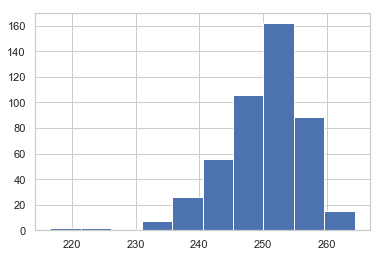

In [18]:
plt.hist(df["overall_score"])
plt.show()

2. What are the correlations between this newly created score variable and the expenditure types? Which one of the expenditure type is more correlated than the others?

ANSWER:  Instructional and support expenditures are very highly correlated with total expenditures at .99. After that, instruction and support services are highly correlated at .97. Overall, it seems total expenditures is most correlated to the others. 

In [19]:
df[["overall_score", "TOTAL_EXPENDITURE", "INSTRUCTION_EXPENDITURE",
              "SUPPORT_SERVICES_EXPENDITURE", "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE"]].corr()

,overall_score,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
overall_score,1.000000,0.075512,0.088749,0.080542,0.013082,-0.003854
TOTAL_EXPENDITURE,0.075512,1.000000,0.990255,0.992988,0.943702,0.925784
INSTRUCTION_EXPENDITURE,0.088749,0.990255,1.000000,0.974399,0.902173,0.884798
SUPPORT_SERVICES_EXPENDITURE,0.080542,0.992988,0.974399,1.000000,0.952282,0.911245
OTHER_EXPENDITURE,0.013082,0.943702,0.902173,0.952282,1.000000,0.918188
CAPITAL_OUTLAY_EXPENDITURE,-0.003854,0.925784,0.884798,0.911245,0.918188,1.000000


3. Now, apply PCA to the four expenditure types. How much of the total variance is explained by the first component?

In [21]:
X = df[["INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
                  "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE"]]

X = StandardScaler().fit_transform(X)

sklearn_pca = PCA(n_components=1)
df["pca_1"] = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.9430175]


4. What is the correlation between the overall score variable and the first principal component?

ANSWER:  The correlation is 0.046285 or very low. 

In [22]:
df[["overall_score", "pca_1", "TOTAL_EXPENDITURE", "INSTRUCTION_EXPENDITURE",
              "SUPPORT_SERVICES_EXPENDITURE", "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE"]].corr()

,overall_score,pca_1,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
overall_score,1.000000,0.046285,0.075512,0.088749,0.080542,0.013082,-0.003854
pca_1,0.046285,1.000000,0.992054,0.968606,0.988345,0.971343,0.955792
TOTAL_EXPENDITURE,0.075512,0.992054,1.000000,0.990255,0.992988,0.943702,0.925784
INSTRUCTION_EXPENDITURE,0.088749,0.968606,0.990255,1.000000,0.974399,0.902173,0.884798
SUPPORT_SERVICES_EXPENDITURE,0.080542,0.988345,0.992988,0.974399,1.000000,0.952282,0.911245
OTHER_EXPENDITURE,0.013082,0.971343,0.943702,0.902173,0.952282,1.000000,0.918188
CAPITAL_OUTLAY_EXPENDITURE,-0.003854,0.955792,0.925784,0.884798,0.911245,0.918188,1.000000


5. If you were to choose the best variables for your model, would you prefer using the first principal component instead of the expenditure variables? Why?





PCA works best when variables are moderately correlated. Here, because so many of the expenditure variables were highly correlated, PCA is not optimal as reflected in the low correlation so using instructional and maybe perhaps support services would be better. 